<a href="https://colab.research.google.com/github/darthfelipe21/DataScientist2/blob/main/Autolab_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerías útiles
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import warnings
import pandas as pd

In [ ]:
# Librerías necesarias
from IPython.display import display
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

warnings.filterwarnings('ignore')
%matplotlib inline

### <font color='green'>Python</font>
### Ejercicio: Busca palabras

Escribe una función `busca_palabras(texto: str, palabras: list[str]) -> dict[str, int]` que tome un texto y una lista de palabras, y devuelva un diccionario con la frecuencia de cada palabra de la lista en el texto.

In [ ]:
def busca_palabras(texto, palabras):
    # Diccionario con frecuencia de cada palabra
    frecuencia = {palabra: 0 for palabra in palabras}

    # Eliminar caracteres especiales y pasar a minuscula
    texto = ''.join(e for e in texto if e.isalnum() or e.isspace()).lower()

    # Separamos el texto
    palabras_texto = texto.split()

    # Contar frecuencia de cada palabra
    for palabra in palabras:
        frecuencia[palabra] = palabras_texto.count(palabra)

    return frecuencia

In [ ]:
# Probemos tu función con el siguiente texto
noticia = """El Planeta. Los astrónomos han descubierto un fenómeno sorprendente en nuestro sistema solar. Un planeta, previamente no identificado, parece haber entrado en nuestro sistema solar desde el espacio interestelar.
Este planeta, provisionalmente denominado "Eris II!", ha causado un gran revuelo en la comunidad astronómica. Según los primeros informes, el planeta es aproximadamente del tamaño de Marte y parece tener una composición similar a la de los planetas gigantes gaseosos como Júpiter y Saturno.
El planeta fue descubierto por un equipo de astrónomos de la Universidad de California, que estaban utilizando el telescopio espacial Kepler para estudiar las estrellas en la constelación de Cygnus. El equipo se dio cuenta de que una estrella parecía oscurecerse periódicamente, un signo clásico de un planeta en tránsito.
"Estábamos buscando planetas alrededor de otras estrellas, así que fue una gran sorpresa cuando nos dimos cuenta de que este planeta estaba mucho más cerca de casa", dijo la Dra. Jane Foster, líder del equipo de investigación.
El descubrimiento de este nuevo planeta plantea muchas preguntas. ¿Cómo logró este planeta entrar en nuestro sistema solar sin ser detectado antes? ¿Podría haber otros planetas desconocidos en nuestro sistema solar? ¿Y qué efectos podría tener este planeta en los otros planetas de nuestro sistema solar?
"Este es un momento emocionante para la ciencia planetaria", dijo el Dr. Foster. "Cada nuevo planeta que descubrimos nos enseña algo nuevo sobre nuestro sistema solar y sobre cómo se forman y evolucionan los planetas".
La búsqueda de respuestas a estas preguntas está en marcha. Los astrónomos de todo el mundo están apuntando sus telescopios hacia este nuevo planeta, y las misiones espaciales futuras podrían ser redirigidas para estudiar este intrigante nuevo miembro de nuestro sistema solar.
Mientras tanto, el planeta Eris II sigue su camino a través de nuestro sistema solar, un recordatorio de cuánto queda por descubrir en nuestra propia esquina del universo.
"""

palabras = ['planeta', 'estrella']
busca_palabras(noticia, palabras) # -> {'planeta': 13, 'estrella': 1}

{'planeta': 13, 'estrella': 1}

## <font color='green'> Clustering </font>

El archivo UL03.csv contiene una muestra de datos. Aplicar el algoritmo DBSCAN sobre los datos del archivo.

1. Calcular las métricas de calidad de clusters: de homogeneidad, completitud, y mean silhouette score.

2. Seleccionar los mejores parámetros (eps, min_sample) según los puntajes de calidad del clúster.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carga de datos y printearlo
df= pd.read_csv('UL03.csv')
df

,x,y,shape
0,-0.803739,-0.853053,1
1,0.852851,0.367618,1
2,0.927180,-0.274902,1
3,-0.752626,-0.511565,1
4,0.706846,0.810679,1
...,...,...,...
1095,0.956063,-2.473828,6
1096,0.930758,-2.366531,6
1097,0.989555,-2.475225,6
1098,0.979200,-2.637578,6


In [ ]:
# Columnas relevantes para el clustering
data = df[['x', 'y']]

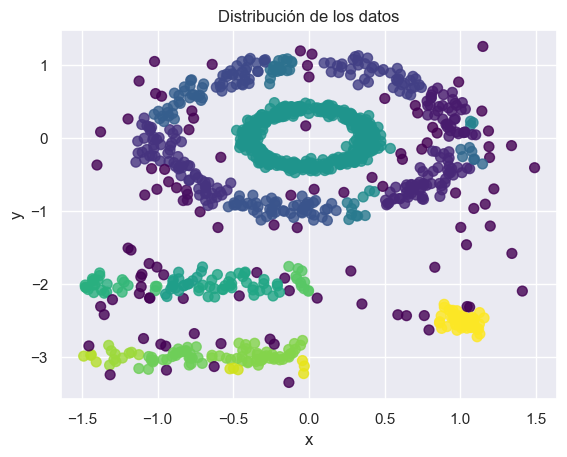

In [ ]:
# Grafico de dispersión
plt.scatter(df['x'], df['y'], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.title('Distribución de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Usar StandarScaler para mejorar el rendimiento de DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# DBSCAN con diferentes valores de eps y min_samples
best_eps = None
best_min_samples = None
best_score = -1
rango= [0.1, 0.5, 1.0, 1.5 ,2.0]

for eps in rango:
    for min_samples in [3, 5, 7, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)

        # Chequear si hay mas de un cluster antes de calcular la silhouette
        if len(set(labels)) > 1:
            # Metricas de calidad de clusters
            homogeneity = round(metrics.homogeneity_score(df['shape'], labels),2)
            completeness = round(metrics.completeness_score(df['shape'], labels), 2)
            silhouette_score = round(metrics.silhouette_score(data_scaled, labels), 2)

            # Puntaje general basado en las metricas
            score = round(homogeneity + completeness + silhouette_score, 2)

            # Actualizar los mejores parámetros si se encuentra un puntaje mejor
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

In [ ]:
# Imprimir mejores parametros y metricas de calidad de clusters
print(f"Score General: {score}")
print('*'*20)
print(f"Mejores parametros: eps={best_eps}, min_samples={best_min_samples}")
print('*'*20)
print(f"Homogeneidad: {homogeneity}")
print('*'*20)
print(f"Completitud: {completeness}")
print('*'*20)
print(f"Silhouette Score: {silhouette_score}")

Score General: 1.38
********************
Mejores parametros: eps=0.1, min_samples=3
********************
Homogeneidad: 0.13
********************
Completitud: 0.91
********************
Silhouette Score: 0.34
